In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import shutil
from glob import glob
from PIL import Image 
import os

In [2]:
# Load Meta Data
my_file = open("head_info.csv", "r")
content = my_file. read()
exec('header=' + content)
data_raw = pd.read_csv("label_list.csv", sep='\t', names=header, engine='python', error_bad_lines=False)
print(f"The full dataset contains {len(data_raw)} pictures")
print(f"The full dataset contains {len(data_raw['author_name'].unique())} artists")

Skipping line 627904: '	' expected after '"'
Skipping line 631316: '	' expected after '"'
Skipping line 631322: '	' expected after '"'
Skipping line 730917: '	' expected after '"'
Skipping line 730918: '	' expected after '"'
Skipping line 730919: '	' expected after '"'
Skipping line 730920: '	' expected after '"'
Skipping line 730921: '	' expected after '"'
Skipping line 730922: '	' expected after '"'
Skipping line 730923: '	' expected after '"'
Skipping line 730924: '	' expected after '"'
Skipping line 730925: '	' expected after '"'
Skipping line 730926: '	' expected after '"'
Skipping line 730927: '	' expected after '"'
Skipping line 730928: '	' expected after '"'
Skipping line 730929: '	' expected after '"'
Skipping line 730930: '	' expected after '"'
Skipping line 730931: '	' expected after '"'
Skipping line 730933: '	' expected after '"'
Skipping line 756135: '	' expected after '"'
Skipping line 765395: '	' expected after '"'
Skipping line 766699: '	' expected after '"'


The full dataset contains 766799 pictures
The full dataset contains 41095 artists


In [3]:
# Check witch artist have a directory in the dataset
artist_directories = glob("Artists1/*/") + glob("Artists2/*/")
artist_list = data_raw["author_name"].unique()
artist_dir = dict(zip(artist_list, [[] for _ in artist_list]))

for path in artist_directories:
    artist = path.split('\\')[1]
    if artist_dir.get(artist) is not None:
        artist_dir.get(artist).append(path)

artist_dir = {k:v for k,v in artist_dir.items() if v}

In [4]:
# Drop datapoint where no files are in in the dataset
data_raw.dropna(axis=0, subset=["Path"], inplace=True)
data_raw = data_raw[data_raw['author_name'].isin(artist_dir.keys())]
print(f"The full dataset contains {len(data_raw)} pictures with file")
print(f"The full dataset contains {len(artist_dir.keys())} artists with file")

# Determine Artists that have the most examples in the dataset
selected_artists = list(data_raw["author_name"].value_counts()[25:50].index)

# Filter dataset to only contain the artists used
selected_meta_data = data_raw[data_raw["author_name"].isin(selected_artists)]

The full dataset contains 481088 pictures with file
The full dataset contains 7599 artists with file


In [5]:
print(f"The constraint dataset contains {len(selected_meta_data)} pictures")
print(f"The constraint dataset contains {len(selected_artists)} artists")

The constraint dataset contains 30355 pictures
The constraint dataset contains 25 artists


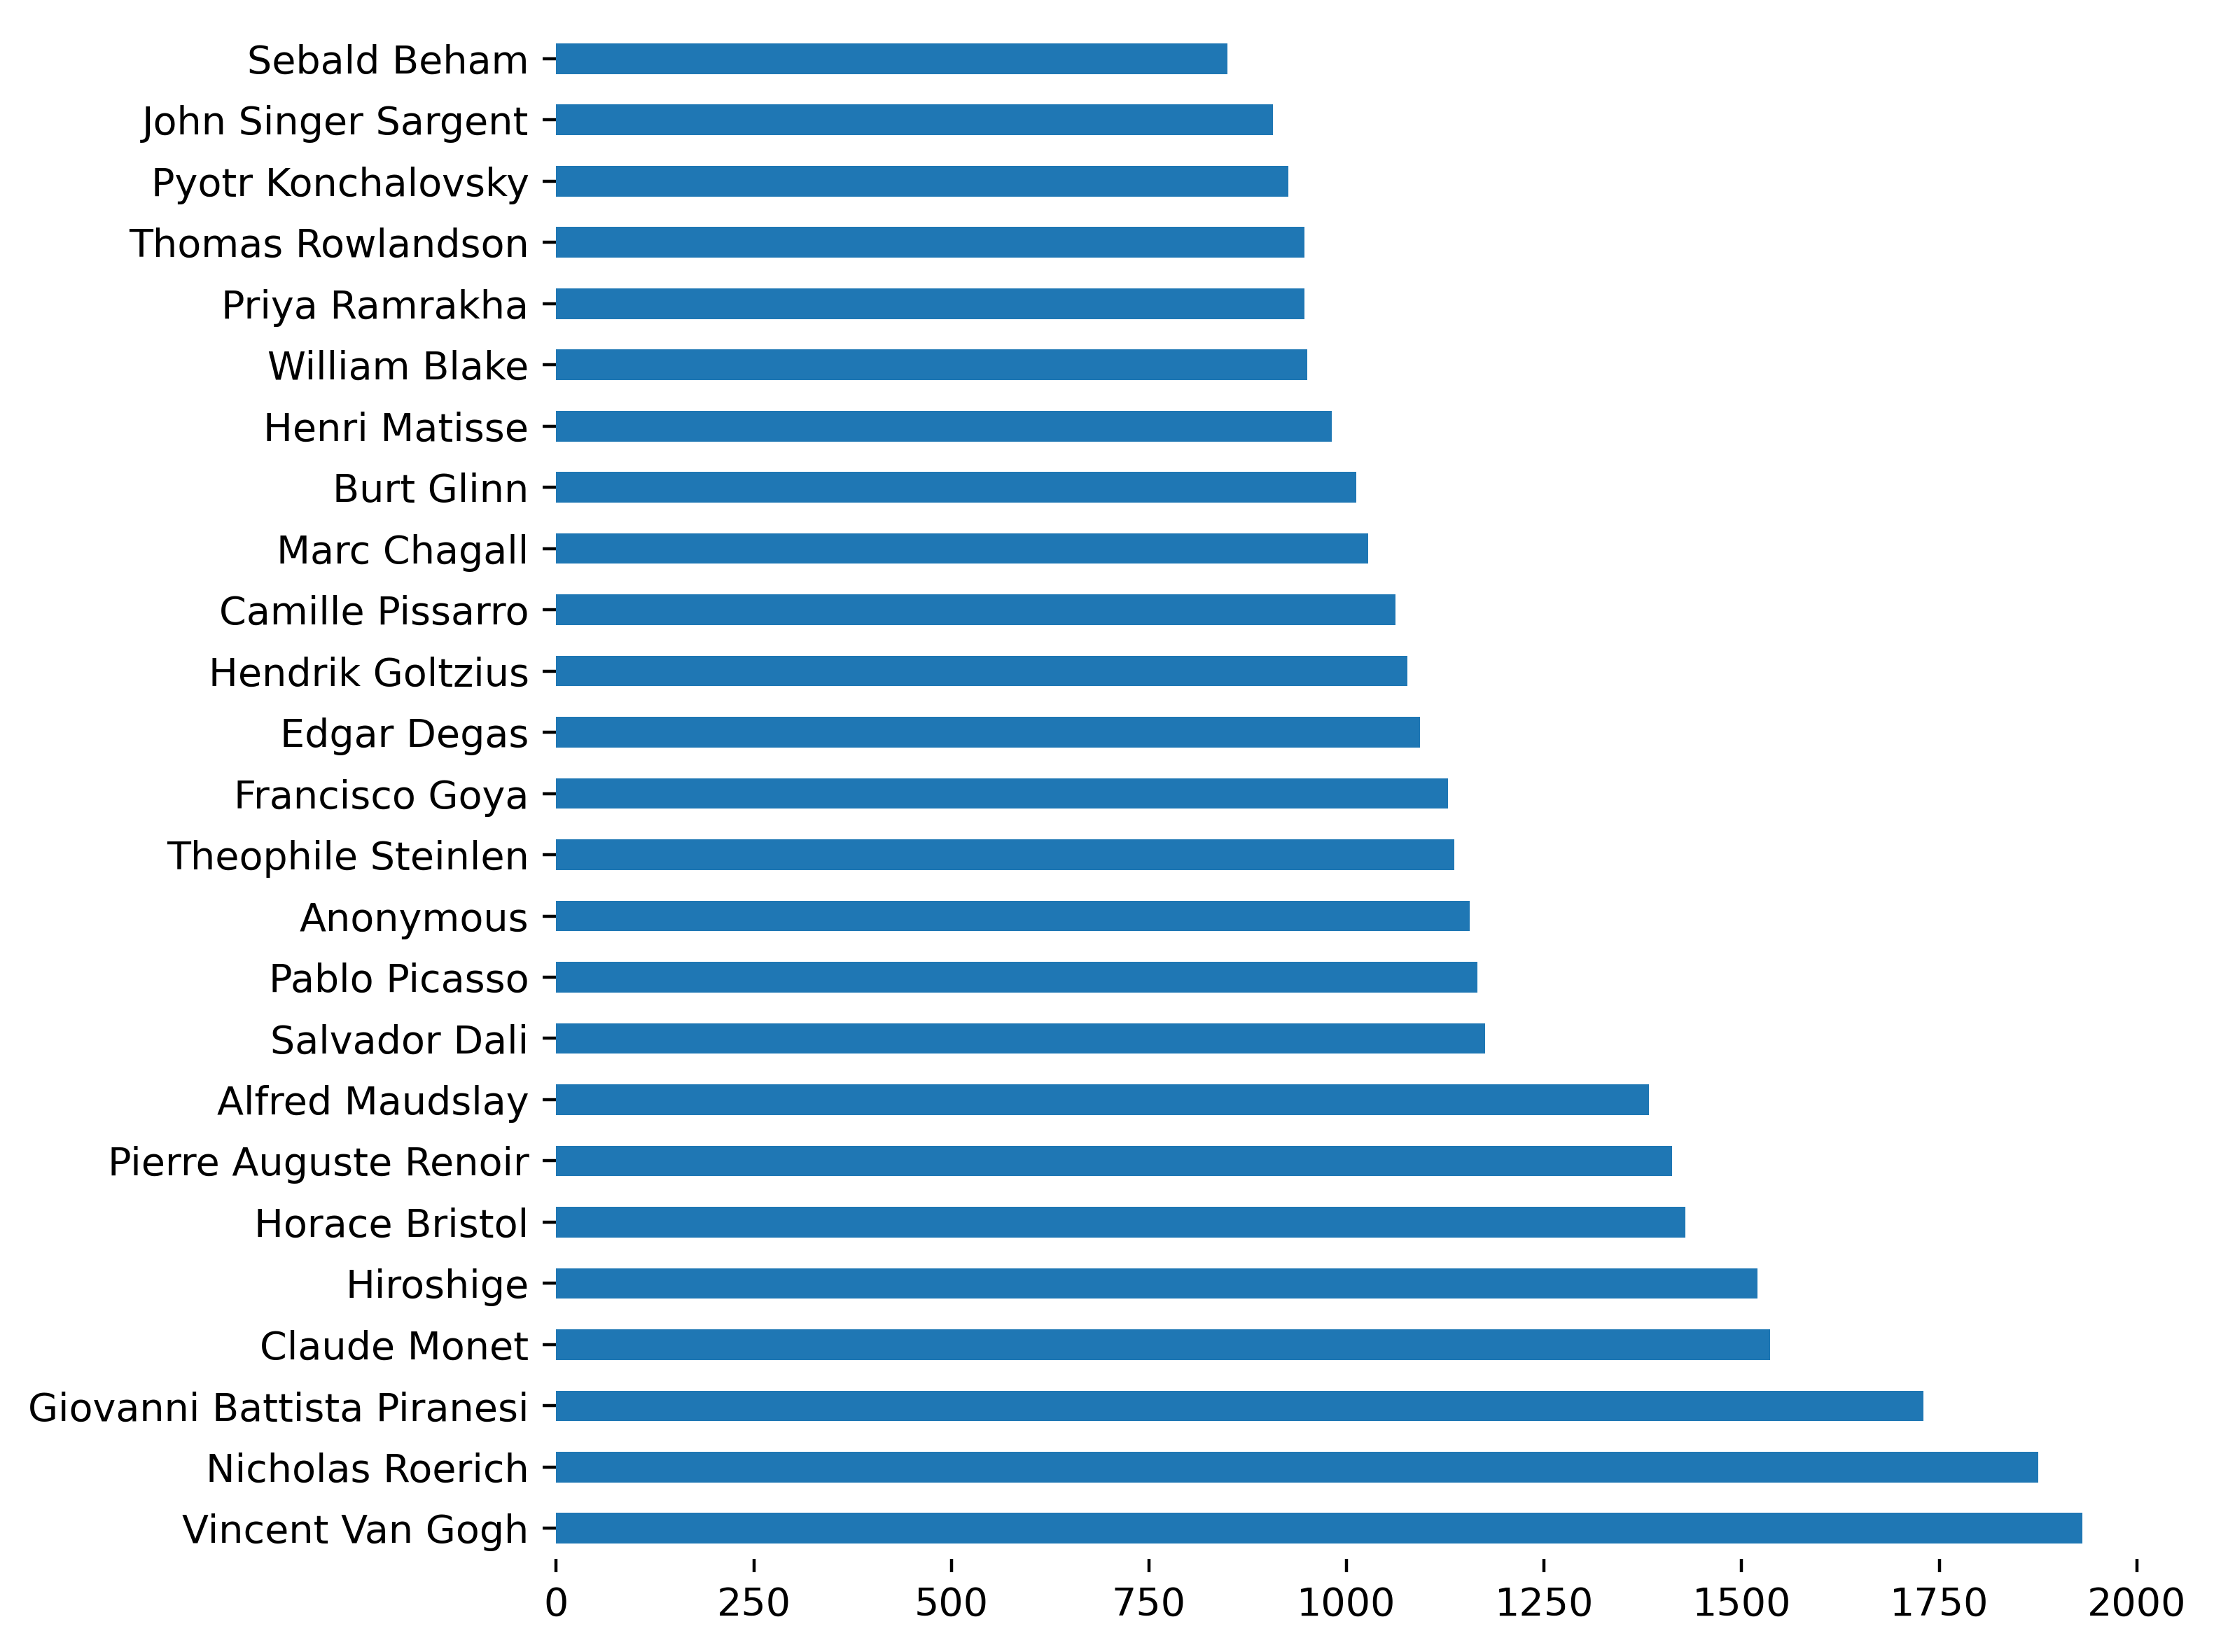

In [6]:
plt.figure(figsize=(8, 6), dpi=400)
fig = selected_meta_data['author_name'].value_counts().plot.barh()
plt.box(False)
plt.tight_layout() 
fig.figure.savefig('selectedartists.png', dpi=400)

In [7]:
from PIL import UnidentifiedImageError

total_count = 0
errors = []
for artist in selected_artists:
    new_path = f"{os.getcwd()}\SelectedArtistsSmall\\{artist}"
    if not os.path.isdir(new_path):
        os.mkdir(new_path)
    count = 0
    for path in artist_dir.get(artist):
        for file in os.listdir(path):
            try:
                if file.split("\\")[-1] == 'PaxHeader':
                    continue
                #img = Image.open(path + file)
                #file_name, file_ext = os.path.splitext(file)
                #img.save(new_path + f"\\{file_name}.jpeg")
                shutil.copy(os.path.join(path,file), os.path.join(new_path, file))
                count += 1
                total_count += 1
            except Exception as e:
                print(e)
                errors.append(e)
    print(f"{artist} moved {count} files")
print(f"Total moved {total_count} files")
print(errors)

Vincent Van Gogh moved 1928 files
Nicholas Roerich moved 1875 files
Giovanni Battista Piranesi moved 1683 files
Claude Monet moved 1532 files
Hiroshige moved 1509 files
Horace Bristol moved 1429 files
Pierre Auguste Renoir moved 1405 files
Alfred Maudslay moved 1388 files
Salvador Dali moved 1175 files
Pablo Picasso moved 1162 files
Anonymous moved 9 files
Theophile Steinlen moved 1136 files
Francisco Goya moved 1108 files
Edgar Degas moved 982 files
Hendrik Goltzius moved 1048 files
Camille Pissarro moved 1036 files
Marc Chagall moved 1027 files
Burt Glinn moved 1012 files
Henri Matisse moved 981 files
William Blake moved 856 files
Thomas Rowlandson moved 863 files
Priya Ramrakha moved 947 files
Pyotr Konchalovsky moved 925 files
John Singer Sargent moved 903 files
Sebald Beham moved 317 files
Total moved 28236 files
[]


In [ ]:
artist_dir.get('Rembrandt')

In [ ]:
for path in glob("SelectedArtists/*/"):
    try:
        shutil.rmtree(path + "PaxHeader")
    except FileNotFoundError:
        pass

In [ ]:
for path in glob("SelectedArtists/*/"):
    new_path = path.replace("SelectedArtists", "SelectedArtists2")
    if not os.path.isdir(new_path):
        os.mkdir(new_path)
    for file in os.listdir(path):
        try:
            img = Image.open(path + file)
            file_name, file_ext = os.path.splitext(file)
            img.save(new_path + "{}.jpeg".format(file_name))
        except (UnidentifiedImageError, FileExistsError) as e:
            print(f"{e} {file}")        

In [ ]:
for path in artist_dir.get("Rembrandt"):
    print(os.listdir(path))